In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from torchvision import transforms, datasets
from torch import nn, optim

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [4]:
image, label = iter(trainloader).next()

In [5]:
image = image.view(image.shape[0],-1)
image.shape
label.shape

torch.Size([64])

In [6]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,10),
                      nn.LogSoftmax(dim=1))

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [7]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for image, label in trainloader:
        image = image.view(image.shape[0],-1)
        
        optimizer.zero_grad()
        
        output = model(image)
        loss = criterion(output, label)
        running_loss += loss
        
        loss.backward()
        optimizer.step()
    else:
        print("epoch - ", e+1 ," | training loss - ", float(running_loss/len(trainloader)))

epoch -  1  | training loss -  0.49614065885543823
epoch -  2  | training loss -  0.3877769112586975
epoch -  3  | training loss -  0.34891587495803833
epoch -  4  | training loss -  0.3270472288131714
epoch -  5  | training loss -  0.3102187514305115


In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
torch.set_printoptions(sci_mode=False)

image, label = iter(testloader).next()
image = image[0].view(1,784)

with torch.no_grad():
    logps = model(image)

ps = torch.exp(logps)

label - Dress


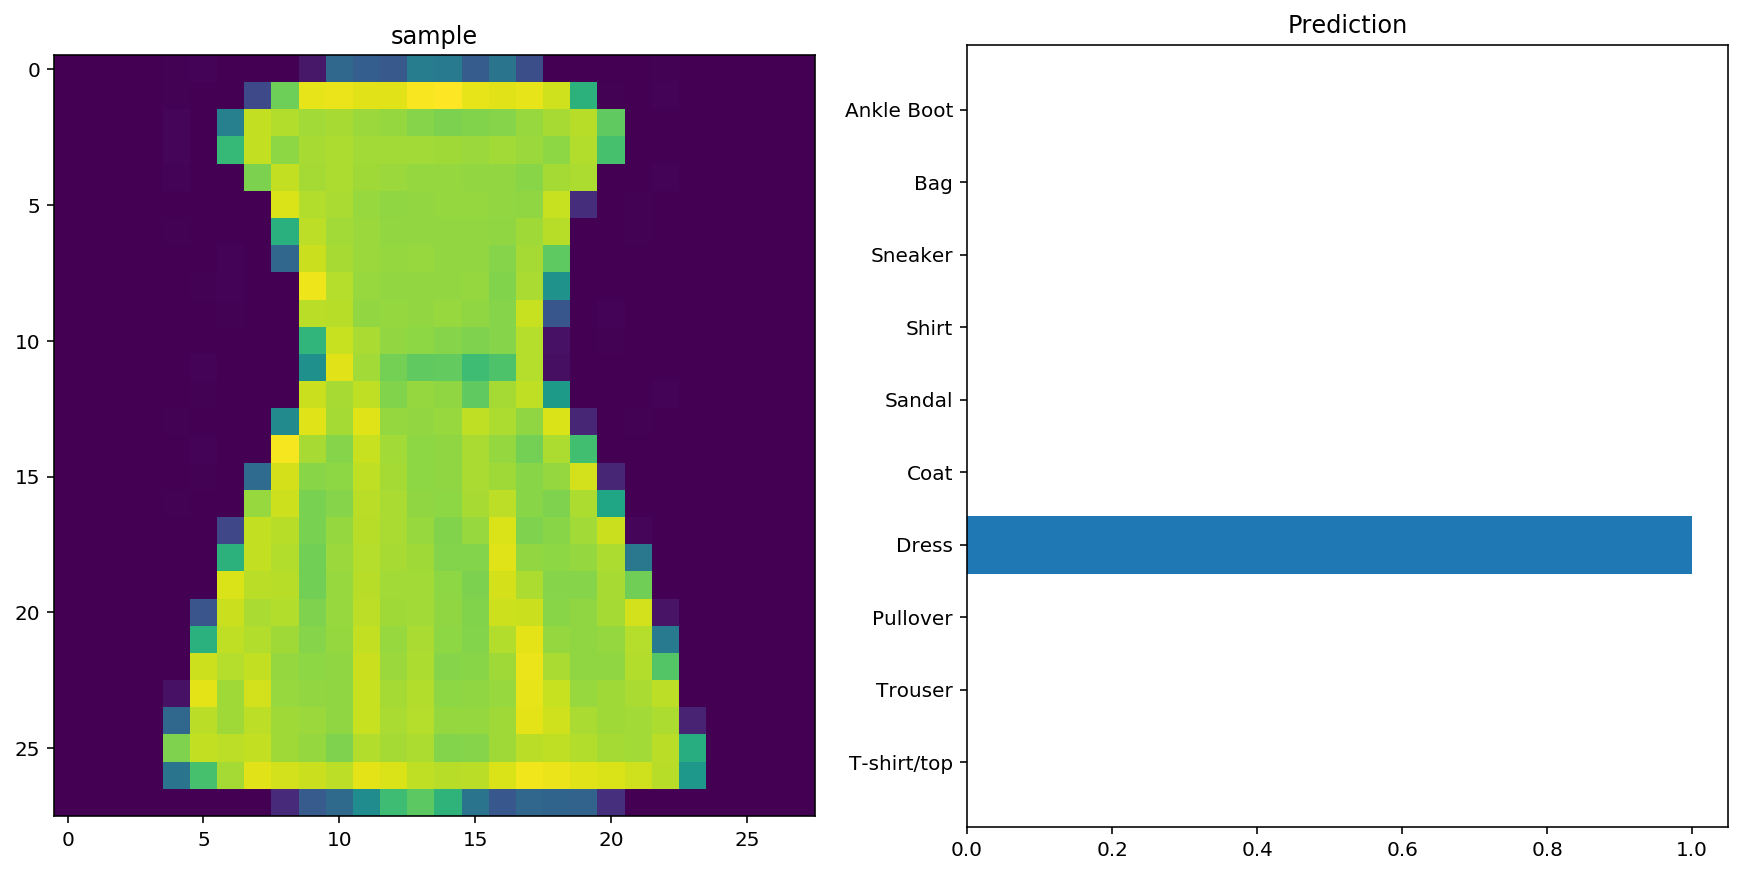

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
axs[0].set_title('sample')
axs[0].imshow(image.view(28,28).numpy().squeeze())

axs[1].set_title('Prediction')
labelnames = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
axs[1].barh(np.arange(10),ps.numpy().squeeze())
axs[1].set_yticks(np.arange(10))
axs[1].set_yticklabels(labelnames)
axs[1].set_aspect(0.1)

print('label -', labelnames[label[0]] )